# Data Wrangling Final
- Michael Roper
- 05-07-2025
- This is just the code for the major components of the project, which includes analysis for IMDb Ratings vs. Box Office Sucecss 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re 


## 1. Loading Data

In [4]:
# Load the dataset
file_path = 'movies_with_genre_dummies.csv'
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully.")
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nColumn names:")
    print(df.columns.tolist())
    print("\nData types:")
    print(df.info())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    # Stop execution if file not found
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    # Stop execution on other loading errors
    exit()


Data loaded successfully.
Dataset shape: (999, 29)

First 5 rows:


,Series_Title,IMDB_Rating,Genre,Runtime,Certificate,Released_Year,Rank,Lifetime Gross,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Shawshank Redemption,9.3,Drama,142.0,A,1994,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,9.2,"Crime, Drama",175.0,A,1972,717.0,2.503422e+08,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,9.0,"Action, Crime, Drama",152.0,UA,2008,56.0,1.009057e+09,1,0,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather: Part II,9.0,"Crime, Drama",202.0,A,1974,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,9.0,"Crime, Drama",96.0,U,1957,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0



Column names:
['Series_Title', 'IMDB_Rating', 'Genre', 'Runtime', 'Certificate', 'Released_Year', 'Rank', 'Lifetime Gross', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series_Title    999 non-null    object 
 1   IMDB_Rating     999 non-null    float64
 2   Genre           999 non-null    object 
 3   Runtime         999 non-null    float64
 4   Certificate     898 non-null    object 
 5   Released_Year   999 non-null    int64  
 6   Rank            173 non-null    float64
 7   Lifetime Gross  173 non-null    float64
 8   Action          999 non-null    int64  
 9   Adventure       999 non-null    in

## 2. Univariate Analysis

### IMDb Rating

Summary statistics for IMDB Rating:
count    999.000000
mean       7.949650
std        0.275407
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64


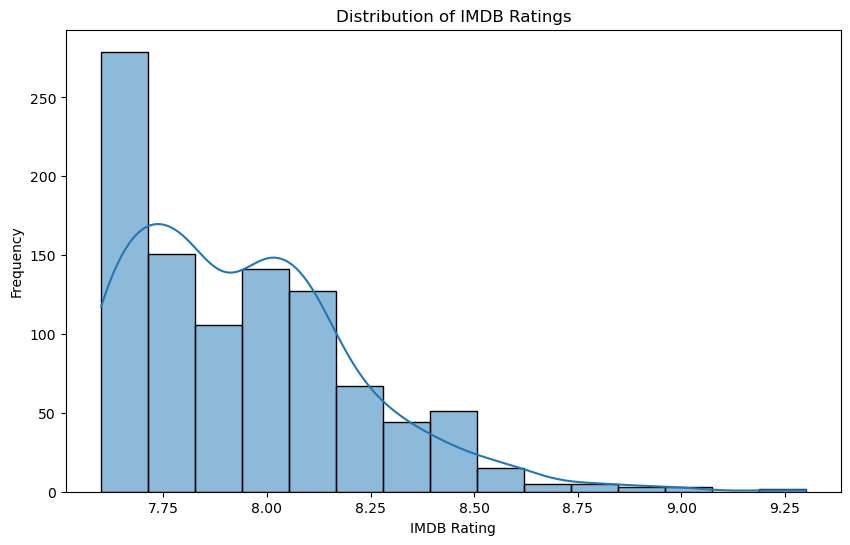

In [7]:
print("Summary statistics for IMDB Rating:")
print(df['IMDB_Rating'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], kde=True, bins=15)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()


### Lifetime Gross 


Summary statistics for Lifetime Gross:
count              173
mean       575,033,113
std        428,841,270
min        201,634,991
25%        306,889,114
50%        451,291,298
75%        723,719,539
max      2,923,710,708
Name: Lifetime Gross, dtype: object


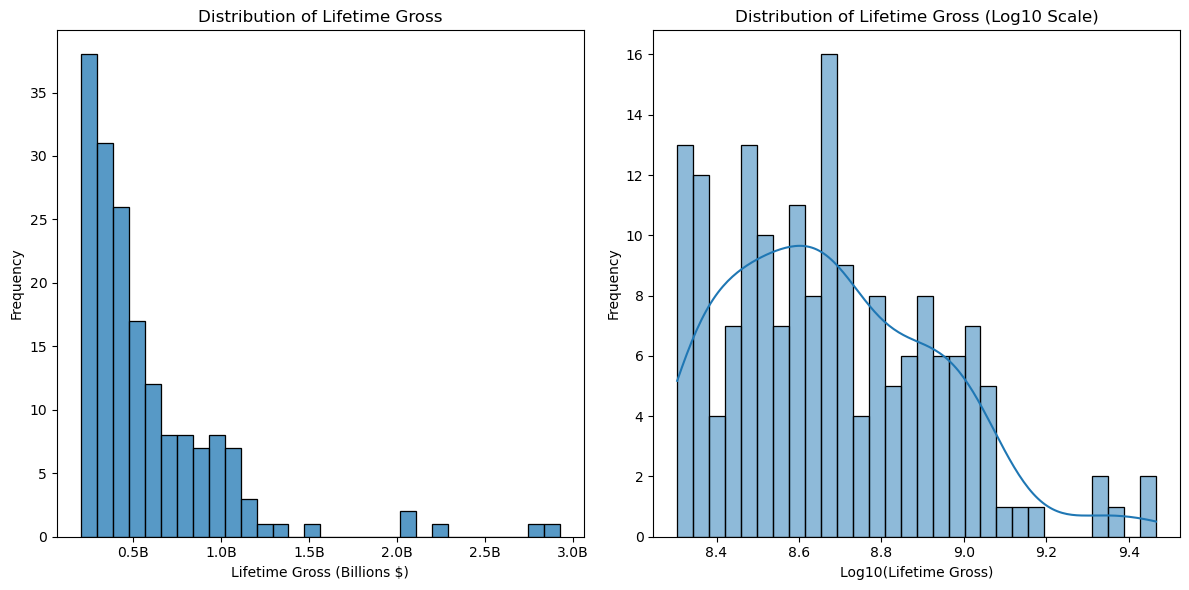

In [9]:
# Check if the column exists and has data
if 'Lifetime Gross' in df.columns and df['Lifetime Gross'].notna().any():
    print("\nSummary statistics for Lifetime Gross:")
    # Format large numbers for readability
    print(df['Lifetime Gross'].describe().apply(lambda x: f"{x:,.0f}"))

    plt.figure(figsize=(12, 6))

    # Histogram on original scale
    plt.subplot(1, 2, 1)
    sns.histplot(df['Lifetime Gross'].dropna(), kde=False, bins=30) # dropna() for safety
    plt.title('Distribution of Lifetime Gross')
    plt.xlabel('Lifetime Gross (Billions $)')
    plt.ylabel('Frequency')
    # Use FuncFormatter for cleaner axis labels
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))


    # Histogram on log scale (better for skewed data)
    plt.subplot(1, 2, 2)
    # Use log10 for potentially easier interpretation
    # Add a small constant (e.g., 1) if there might be zero or negative values, though gross should be positive
    log_gross = np.log10(df['Lifetime Gross'].replace(0, 1).dropna()) # handle potential 0s and NaNs
    sns.histplot(log_gross, kde=True, bins=30)
    plt.title('Distribution of Lifetime Gross (Log10 Scale)')
    plt.xlabel('Log10(Lifetime Gross)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Lifetime Gross analysis as column is missing or empty after potential conversion issues.")


## 3. Bivariate Analysis

### IMDB Rating vs. Lifetime Gross


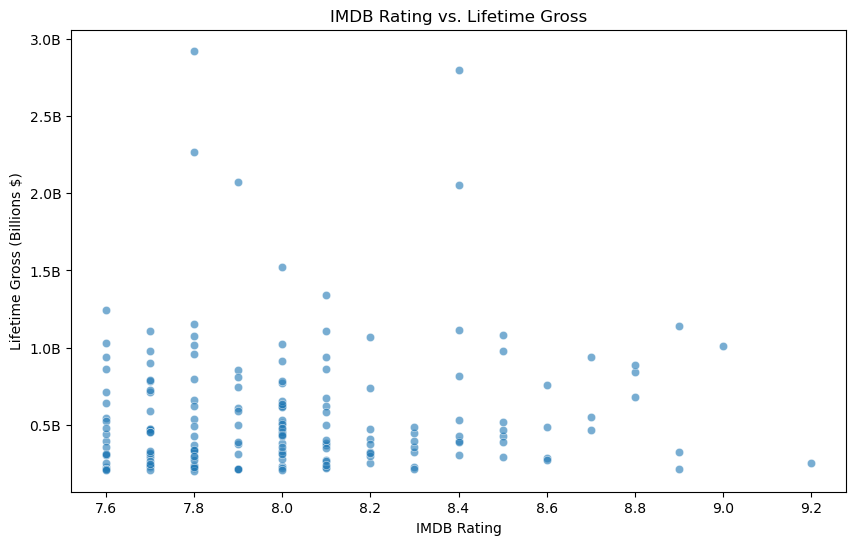


Pearson Correlation between IMDB Rating and Lifetime Gross: 0.069
Pearson p-value: 0.37

Spearman Correlation between IMDB Rating and Lifetime Gross: 0.088
Spearman p-value: 0.248

The Pearson correlation is not statistically significant (p >= 0.05).


In [12]:
if 'Lifetime Gross' in df.columns and df['Lifetime Gross'].notna().any() and \
   'IMDB_Rating' in df.columns and df['IMDB_Rating'].notna().any():
    
    plt.figure(figsize=(10, 6))
    # Drop NA values just for this plot to avoid errors
    plot_data = df[['IMDB_Rating', 'Lifetime Gross']].dropna()
    sns.scatterplot(data=plot_data, x='IMDB_Rating', y='Lifetime Gross', alpha=0.6)
    plt.title('IMDB Rating vs. Lifetime Gross')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Lifetime Gross (Billions $)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))
    plt.show()

    # Calculate Correlation (using data points where both values are present)
    valid_data = df[['IMDB_Rating', 'Lifetime Gross']].dropna()
    if not valid_data.empty:
        correlation, p_value = stats.pearsonr(valid_data['IMDB_Rating'], valid_data['Lifetime Gross'])
        spearman_corr, spearman_p = stats.spearmanr(valid_data['IMDB_Rating'], valid_data['Lifetime Gross'])

        print(f"\nPearson Correlation between IMDB Rating and Lifetime Gross: {correlation:.3f}")
        print(f"Pearson p-value: {p_value:.3g}")
        print(f"\nSpearman Correlation between IMDB Rating and Lifetime Gross: {spearman_corr:.3f}")
        print(f"Spearman p-value: {spearman_p:.3g}")

        if p_value < 0.05:
            print("\nThe Pearson correlation is statistically significant (p < 0.05).")
        else:
            print("\nThe Pearson correlation is not statistically significant (p >= 0.05).")
    else:
        print("\nNot enough valid data points to calculate correlation.")

else:
     print("\nSkipping IMDB Rating vs Lifetime Gross analysis due to missing data.")



### Average Gross Earnings per Genre


Average Lifetime Gross per Genre:
Fantasy      $813,372,740
Adventure    $767,303,609
Action       $722,449,655
Sci-Fi       $716,415,307
Animation    $625,120,797
Music        $618,810,060
Family       $602,823,154
Comedy       $559,354,550
Romance      $528,458,237
Drama        $474,569,231
Thriller     $434,923,742
War          $416,625,829
Crime        $396,978,600
Western      $367,521,142
Mystery      $353,609,501
Biography    $325,248,428
History      $323,201,233
Horror       $320,437,841
Sport        $262,997,670
dtype: object


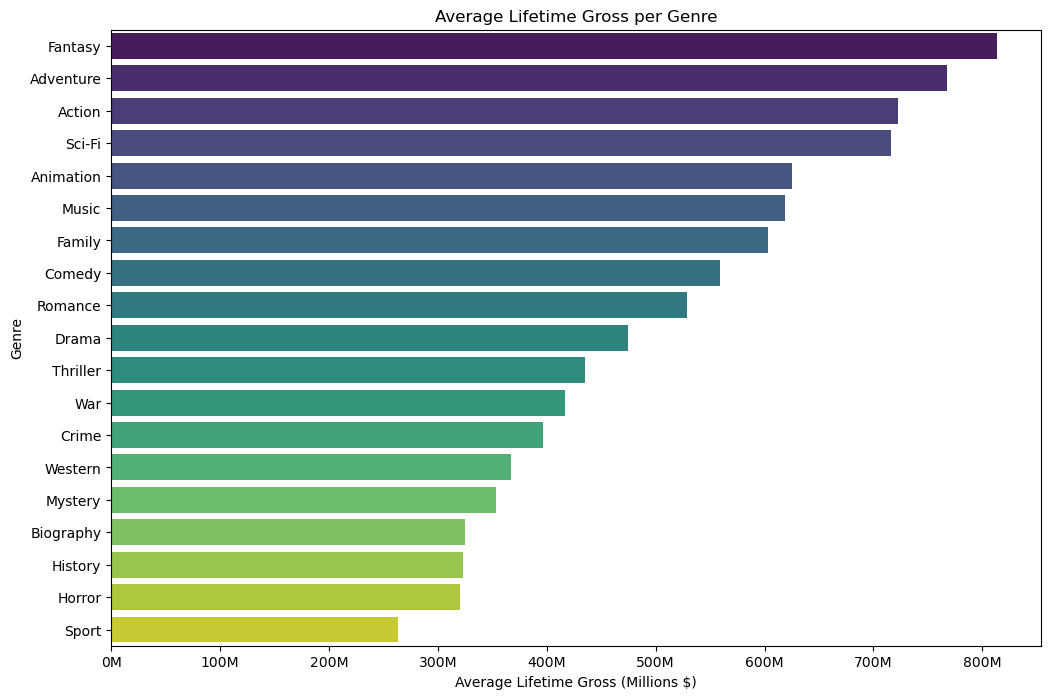

In [14]:
# Identify genre dummy columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Verify genre columns exist
actual_genre_cols = [col for col in genre_cols if col in df.columns]
missing_genre_cols = [col for col in genre_cols if col not in df.columns]

if missing_genre_cols:
    print(f"Warning: The following expected genre columns were not found: {missing_genre_cols}")

if actual_genre_cols and 'Lifetime Gross' in df.columns and df['Lifetime Gross'].notna().any():
    genre_gross_avg = {}
    for genre in actual_genre_cols:
        # Ensure the dummy column is boolean or 0/1
        if pd.api.types.is_numeric_dtype(df[genre]) or pd.api.types.is_bool_dtype(df[genre]):
             # Calculate mean gross for movies belonging to this genre (where dummy == 1 or True)
             # Also ensure Lifetime Gross is not NaN for these rows
             valid_gross_for_genre = df.loc[(df[genre] == 1) | (df[genre] == True), 'Lifetime Gross'].dropna()
             if not valid_gross_for_genre.empty:
                avg_gross = valid_gross_for_genre.mean()
                genre_gross_avg[genre] = avg_gross
        else:
            print(f"Warning: Genre column '{genre}' is not numeric or boolean, skipping.")


    if genre_gross_avg: # Check if dictionary is not empty
        # Convert to Series for easy sorting and plotting
        genre_gross_series = pd.Series(genre_gross_avg).sort_values(ascending=False)

        print("\nAverage Lifetime Gross per Genre:")
        print(genre_gross_series.apply(lambda x: f"${x:,.0f}"))

        plt.figure(figsize=(12, 8))
        sns.barplot(x=genre_gross_series.values, y=genre_gross_series.index, palette="viridis")
        plt.title('Average Lifetime Gross per Genre')
        plt.xlabel('Average Lifetime Gross (Millions $)')
        plt.ylabel('Genre')
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
        plt.show()
    else:
        print("\nCould not calculate average gross per genre. Check genre columns and data.")

else:
     print("\nSkipping Average Gross per Genre analysis due to missing data or genre columns.")


## 4. Hypothesis Test

### **Hypothesis 1:** Higher ratings correlate with higher earnings.
### * **H₀ (Null):** There is no correlation between IMDb rating and lifetime gross earnings ($\rho = 0$).
### * **H₁ (Alternative):** There is a positive correlation between IMDb rating and lifetime gross earnings ($\rho > 0$).

### We will use the correlation coefficients calculated earlier. Spearman's rank correlation is often preferred for potentially non-linear relationships or non-normally distributed data.


In [17]:
if 'Lifetime Gross' in df.columns and df['Lifetime Gross'].notna().any() and \
   'IMDB_Rating' in df.columns and df['IMDB_Rating'].notna().any():
    # Re-calculate Spearman using valid data points
    valid_data = df[['IMDB_Rating', 'Lifetime Gross']].dropna()

    if not valid_data.empty and len(valid_data) > 1: # Need at least 2 points for correlation
        spearman_corr, spearman_p = stats.spearmanr(valid_data['IMDB_Rating'], valid_data['Lifetime Gross'])

        print(f"\n--- Hypothesis Test: Rating vs. Earnings ---")
        print(f"Spearman Correlation Coefficient (rho): {spearman_corr:.3f}")
        # For a one-tailed test (rho > 0), divide the two-tailed p-value by 2
        one_tailed_p_value = spearman_p / 2
        print(f"One-tailed p-value: {one_tailed_p_value:.3g}")

        alpha = 0.05
        print(f"Significance Level (alpha): {alpha}")

        if spearman_corr > 0 and one_tailed_p_value < alpha:
            print(f"\nResult: Reject the null hypothesis (H₀).")
            print("There is a statistically significant positive correlation between IMDB Rating and Lifetime Gross.")
        elif spearman_corr <= 0 and one_tailed_p_value < alpha :
             print(f"\nResult: Reject the null hypothesis (H₀).")
             print("There is a statistically significant *non-positive* correlation (rho <= 0). This contradicts H1.")
        else: # p_value >= alpha or correlation is not positive when testing for positive corr
            print(f"\nResult: Fail to reject the null hypothesis (H₀).")
            print("There is not enough evidence to conclude a significant positive correlation at the chosen alpha level.")
    else:
        print("\nSkipping Hypothesis Test - not enough valid data points.")
else:
    print("\nSkipping Hypothesis Test due to missing data.")


--- Hypothesis Test: Rating vs. Earnings ---
Spearman Correlation Coefficient (rho): 0.088
One-tailed p-value: 0.124
Significance Level (alpha): 0.05

Result: Fail to reject the null hypothesis (H₀).
There is not enough evidence to conclude a significant positive correlation at the chosen alpha level.


## 5. Machine Learning: Logistic Regression and Classification

### Predicting `Earning classification` based on `IMDB_Rating`, `Runetime`, `Genre`, and `Rank`

Tertile Cutoffs:
Low: <$332.7M
Medium: $332.7M-$588.9M
High: >$588.9M



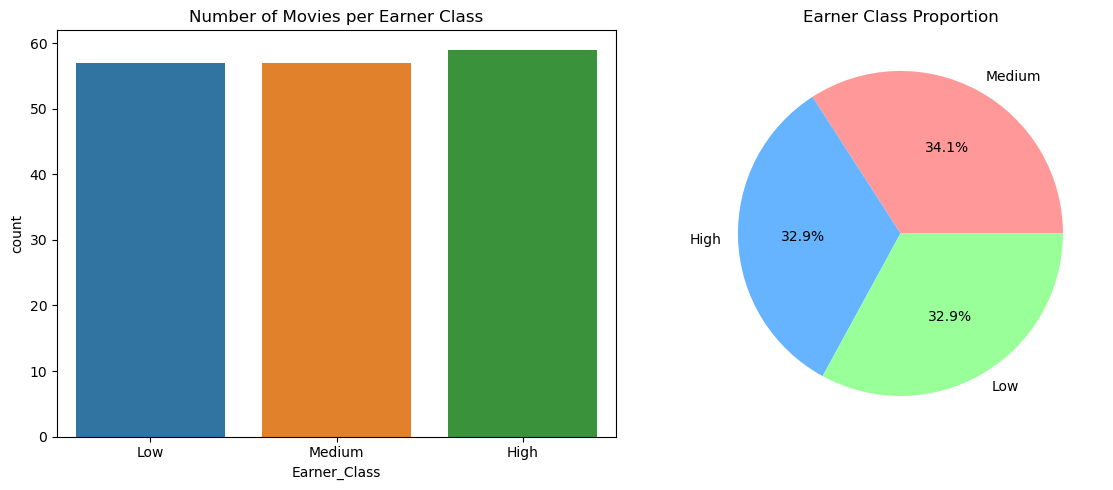


Class Statistics:
                  mean      min       max
Earner_Class                             
Low            $261.8M  $201.6M   $332.1M
Medium         $445.2M  $332.9M   $585.8M
High          $1003.0M  $591.8M  $2923.7M


In [52]:

# Calculate tertile cutoffs
tertiles = df_gross['Lifetime Gross'].quantile([0.33, 0.66])
print(f"Tertile Cutoffs:\nLow: <${tertiles[0.33]/1e6:.1f}M\n"
      f"Medium: ${tertiles[0.33]/1e6:.1f}M-${tertiles[0.66]/1e6:.1f}M\n"
      f"High: >${tertiles[0.66]/1e6:.1f}M\n")

# Plot distribution
plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Earner_Class', data=df_gross, order=['Low', 'Medium', 'High'])
plt.title('Number of Movies per Earner Class')

# Pie chart
plt.subplot(1, 2, 2)
df_gross['Earner_Class'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff','#99ff99'],
    labels=['Medium', 'High', 'Low']  # Order matches value_counts()
)
plt.title('Earner Class Proportion')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Show summary statistics
print("\nClass Statistics:")
print(df_gross.groupby('Earner_Class')['Lifetime Gross'].agg(
    ['mean', 'min', 'max']
).applymap(lambda x: f"${x/1e6:.1f}M"))

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df_gross['Earner_Class_encoded'] = le.fit_transform(df_gross['Earner_Class'])

# Same features as before
features = ['IMDB_Rating', 'Runtime', 'Rank'] + genre_cols
X = df_gross[features]
y = df_gross['Earner_Class_encoded']

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize models
logreg = LogisticRegression(max_iter=2000, multi_class='multinomial')
rf = RandomForestClassifier(n_estimators=100)

# Train and evaluate
for model in [logreg, rf]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"\n{model.__class__.__name__} Results:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print("\nClassification Report:")
    print(classification_report(y_test, preds, target_names=le.classes_))

# Feature Importance for Random Forest
importances = pd.Series(rf.feature_importances_, index=features)
print("\nTop Predictive Features:")
print(importances.sort_values(ascending=False).head(10))


LogisticRegression Results:
Accuracy: 0.97
Confusion Matrix:
[[11  0  1]
 [ 0 12  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.92      0.96        12
         Low       1.00      1.00      1.00        12
      Medium       0.92      1.00      0.96        11

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35


RandomForestClassifier Results:
Accuracy: 0.97
Confusion Matrix:
[[12  0  0]
 [ 0 12  0]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        12
         Low       0.92      1.00      0.96        12
      Medium       1.00      0.91      0.95        11

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97

## 6. Time Series

### Average IMDb Rating over time

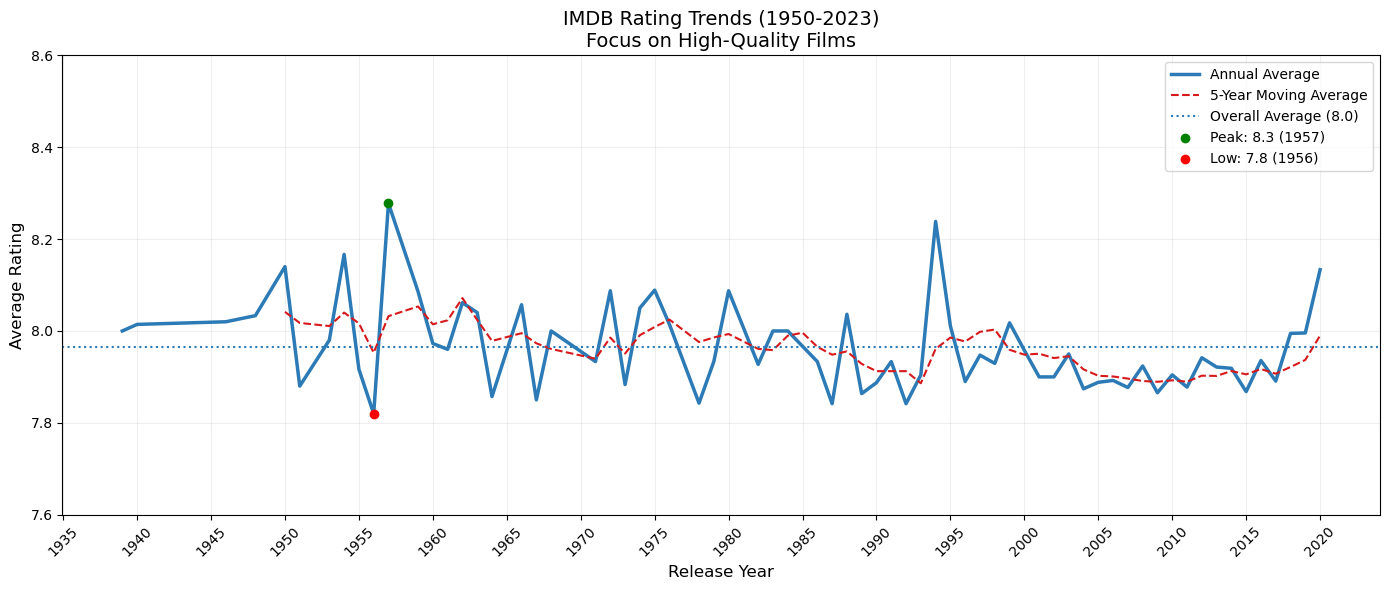

Overall Average Rating: 8.0
Highest Average Year: Released_Year    1957.000000
Avg_Rating          8.277778
Movie_Count         9.000000
MA                  8.032222
Name: 10, dtype: float64
Lowest Average Year: Released_Year    1956.000000
Avg_Rating          7.820000
Movie_Count         5.000000
MA                  7.952667
Name: 9, dtype: float64


In [68]:
plt.figure(figsize=(14, 6))

# Convert years to integers
years = yearly_ratings['Released_Year'].astype(int)

# Create line plot
ax = sns.lineplot(x=years, y='Avg_Rating', data=yearly_ratings, 
                 color='#2c7bb6', linewidth=2.5, label='Annual Average')
sns.lineplot(x=years, y='MA', data=yearly_ratings, 
             color='#d7191c', linestyle='--', label='5-Year Moving Average')

# Formatting
plt.title('IMDB Rating Trends (1950-2023)\nFocus on High-Quality Films', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(7.6, 8.6) 

# Set x-ticks every 5 years
plt.xticks(np.arange(1930, 2025, 5), rotation=45)

# Add statistical annotations
plt.axhline(y=yearly_ratings['Avg_Rating'].mean(), color='#2c7bb6', 
           linestyle=':', label=f'Overall Average ({yearly_ratings["Avg_Rating"].mean():.1f})')
plt.scatter(yearly_ratings['Released_Year'].iloc[yearly_ratings['Avg_Rating'].idxmax()], 
           yearly_ratings['Avg_Rating'].max(), 
           color='green', zorder=10, label=f'Peak: {yearly_ratings["Avg_Rating"].max():.1f} (1957)')
plt.scatter(yearly_ratings['Released_Year'].iloc[yearly_ratings['Avg_Rating'].idxmin()], 
           yearly_ratings['Avg_Rating'].min(), 
           color='red', zorder=10, label=f'Low: {yearly_ratings["Avg_Rating"].min():.1f} (1956)')

plt.grid(True, alpha=0.2)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Display key statistics
print(f"Overall Average Rating: {yearly_ratings['Avg_Rating'].mean():.1f}")
print(f"Highest Average Year: {yearly_ratings.loc[yearly_ratings['Avg_Rating'].idxmax()]}")
print(f"Lowest Average Year: {yearly_ratings.loc[yearly_ratings['Avg_Rating'].idxmin()]}")